## BLENDING AND PASTING IMAGES

addWeighted() function is used to Blend Images(combine them)
A simple formula to blend images:
> new_pixel = (α * pixel_1)  +  (β * pixel_2) + γ

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
img1 = cv2.imread('Images\witcher.jpeg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Images\hills.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [4]:
img1.shape

(307, 474, 3)

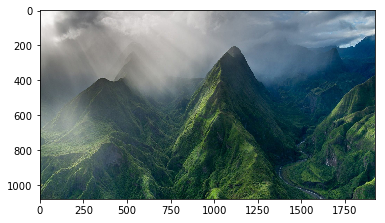

In [5]:
img2.shape


### BLENDING IMAGES OF THE SAME SIZE

In [5]:
#Resize the images to get equal dimensions

img1= cv2.resize(img1, (1000,1000))
img2= cv2.resize(img2, (1000,1000))

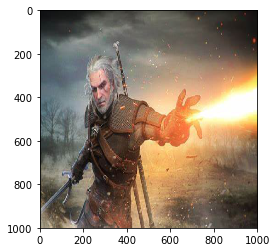

In [6]:
plt.imshow(img1)

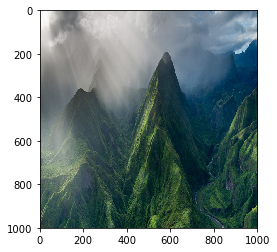

In [7]:
plt.imshow(img2)

In [8]:
#blending using the addWeighted funciton

blended = cv2.addWeighted(src1=img1,alpha=0.5,src2=img2,beta=0.5, gamma=0)

#Increase or Decrease the Alpha and Beta values accordingly to get higher/lower intensity of the image required

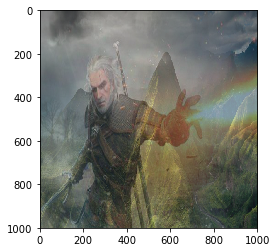

In [9]:
plt.imshow(blended)

## IMAGE THRESHOLDING


In come CV applications, it is often necessary to convert color images to greyscale, since only edges or shapes end up being important.


Thresholding is fundamentally a very simple method of segmenting an image into different parts. It will convert an image to consist of only two values, white or black.

We use the following function to perform thresholding.                                                                                           

> cv2.threshold(image , threshold_value , max_value , type of thresholding)

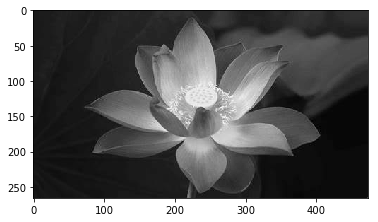

In [10]:
img4 = cv2.imread('Images\\flower.jpeg',0) 
plt.imshow(img4, cmap='gray')

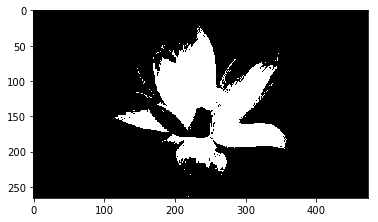

In [11]:

ret,threshold_img = cv2.threshold(img4, 127,255, cv2.THRESH_BINARY)

#After thresholding, all the pixels with values greater than 127 will turn into pure white ones, and the remaining turn black

plt.imshow(threshold_img, cmap='gray')

#There are various other thresholds which can be found in the documentation

In [12]:
crossword = cv2.imread('Images\crossword.jpeg',0)


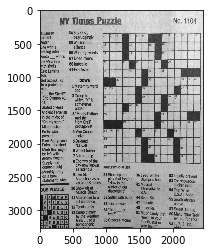

In [13]:
plt.imshow(crossword, cmap='gray')

In [14]:
#The image is too small. To fix it:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

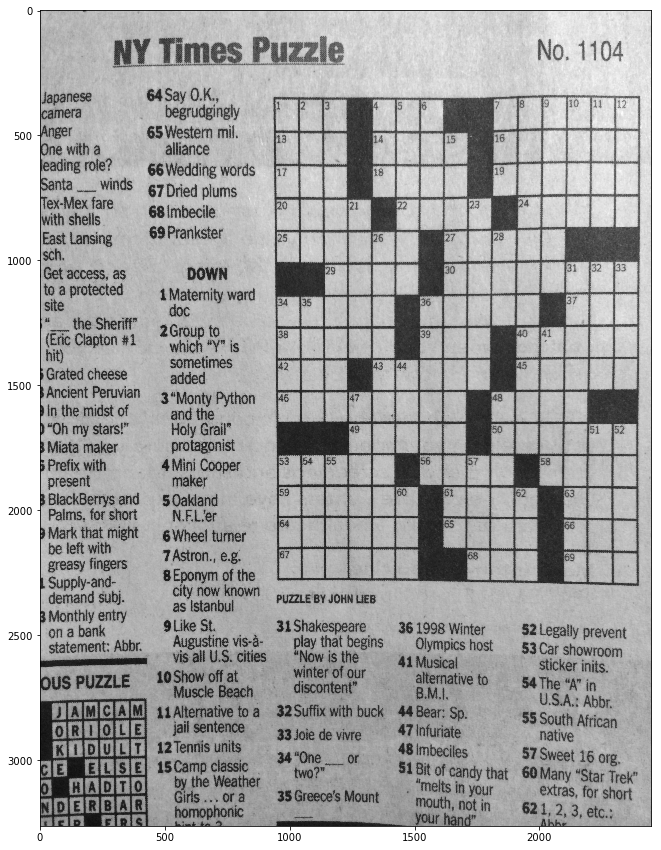

In [15]:
show_pic(crossword)

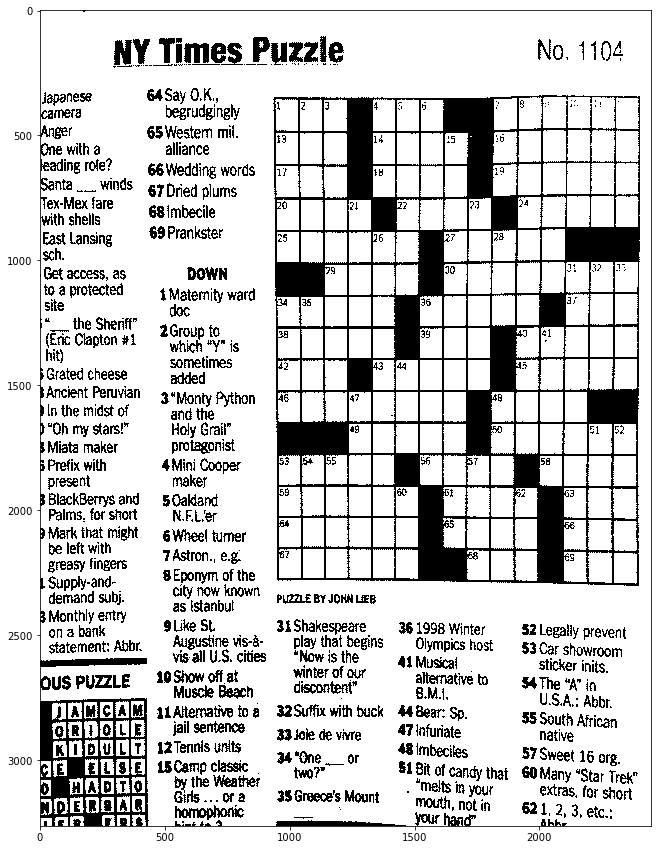

In [16]:
ret, thres1 = cv2.threshold(crossword,120,255,cv2.THRESH_BINARY)
show_pic(thres1)

Another type of threshold is the Adaptive threshold which automatically adapts its threshold based off of the location of the pixels and the grayness around it


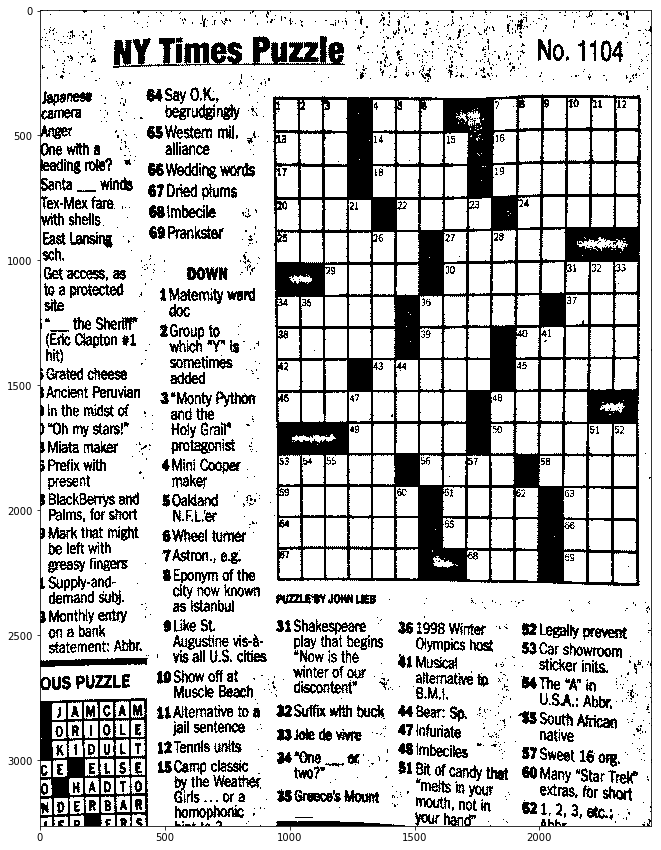

In [17]:
thres2 = cv2.adaptiveThreshold(crossword,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY,131,9)
show_pic(thres2)

#the '131' is the number of neighboring pixel the function checks to adapt itself.
#the last parameter , here '9' is the constand C that is subrtacted from the weighted mean.

## BLURRING AND SMOOTHING IMAGES
Smoothing an image can help get rid of the noise, or help an application focus on general details.

Often, blurring and smoothing is combined with edge detection, many edge detection algorithms detect too many edges when shown a high resolution image without any blurring.

### Gamma Correction
Gamma correction can be applied to make an image appear brighter or darker based on the gamma value chosen.
### Kernel based filters
Kernels can be applied over an image to produce variety of effects. The following website has some an interactive visualization of the above concepts

> http://setosa.io/ev/image-kernels/  

In [18]:
def load_img():
    img = cv2.imread('Images\\bricks.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

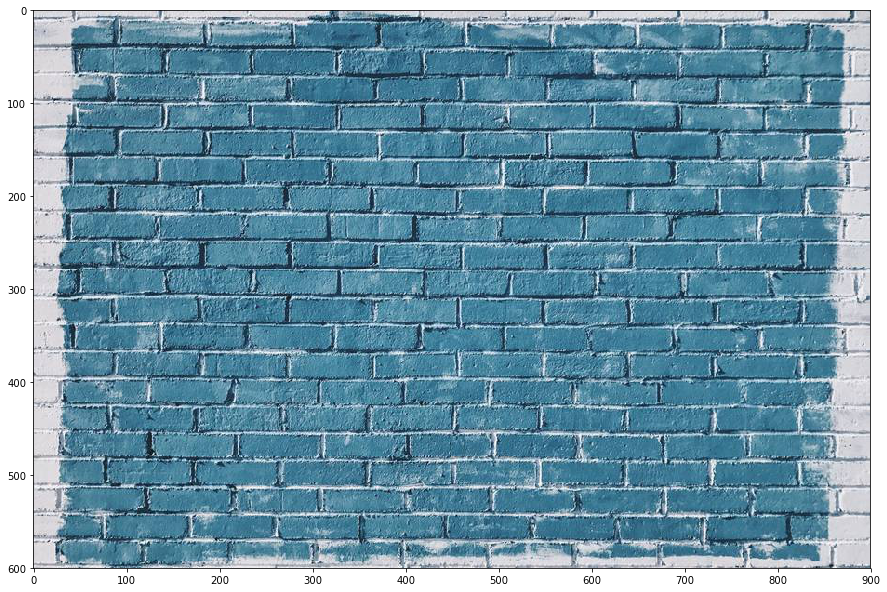

In [19]:
bricks = load_img()
show_pic(bricks)


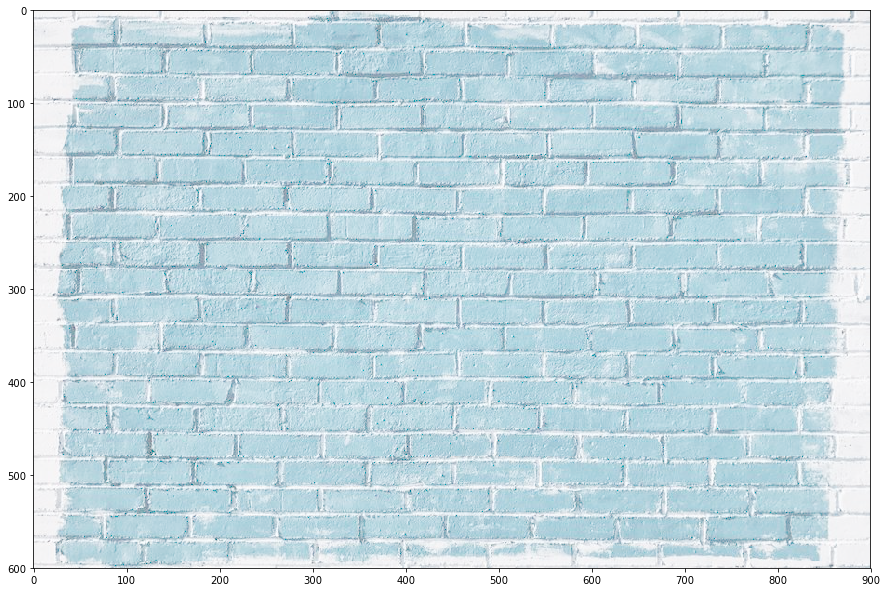

In [20]:
#Decreasing the brightness (or) Smoothening it
gamma = 1/4
newBricks = np.power(bricks, gamma)
show_pic(newBricks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


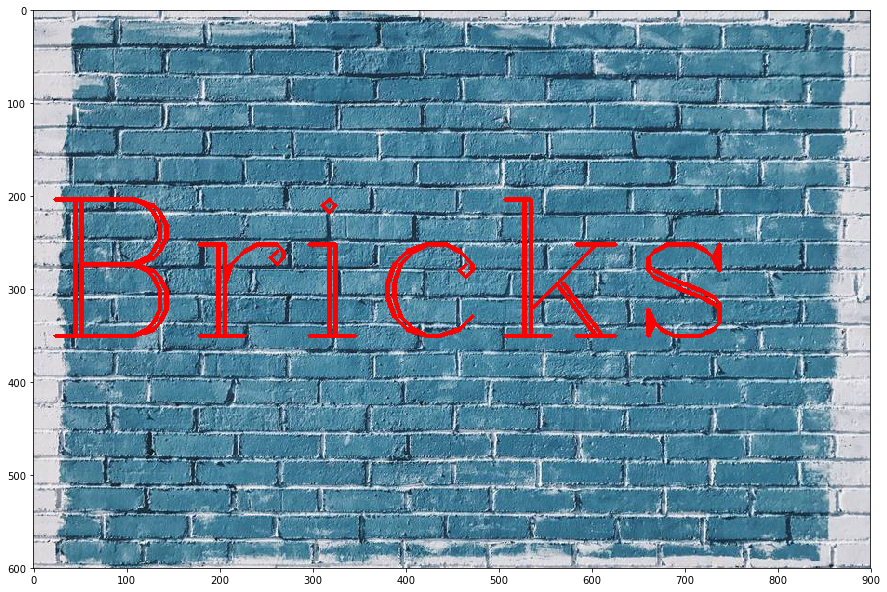

In [21]:
img = load_img()
font = cv2.FONT_HERSHEY_COMPLEX 
cv2.putText(img, text="Bricks",org=(10,350), fontFace=font, fontScale=7,color=(255,0,0),thickness=4)
show_pic(img)

In [22]:
#Creating a kernel
kernel = np.ones(shape=(5,5), dtype=np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


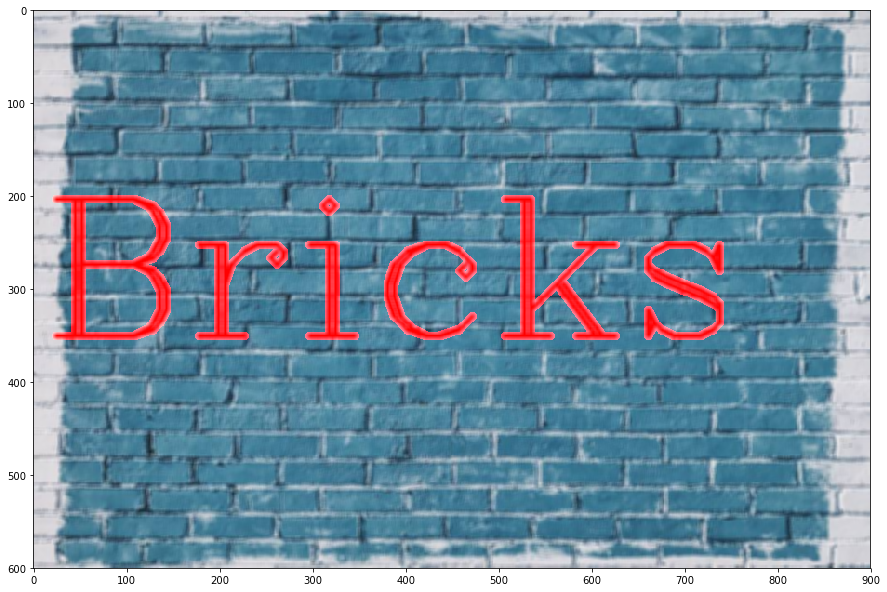

In [23]:
#Applying a 2D Filer
dst = cv2.filter2D(img,-1,kernel)
show_pic(dst)

In [24]:
#resetting the image
img = load_img()
font = cv2.FONT_HERSHEY_COMPLEX 
cv2.putText(img, text="Bricks",org=(10,350), fontFace=font, fontScale=7,color=(255,0,0),thickness=4)
print('reset')

reset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


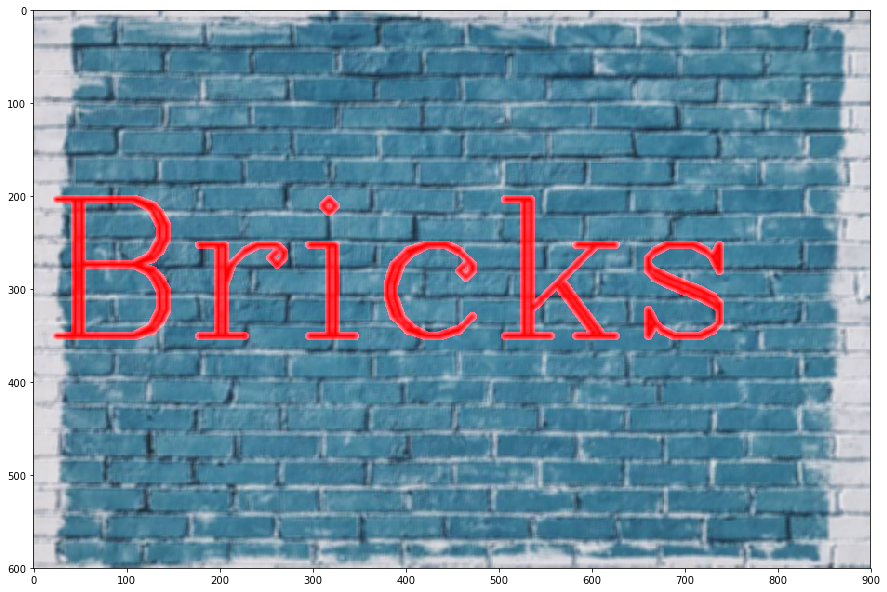

In [25]:
blurred = cv2.blur(img,ksize=(5,5))
show_pic(blurred)